# Initialisation du TPE

Le TPE sera réalisé en [Python](https://www.python.org/), en se basant sur :
1. Un graphe représenté sous forme de matrice CSV
2. La librairie [Pandas](http://pandas.pydata.org/), qui permet de charger facilement des fichiers CSV
3. La libraire [igraph](http://igraph.org/python/), qui implémente l'agorithme de Dijkstra pour calculer le chemin de plus court d'un point à un autre.
4. Le tout est présenté sous forme de notebook [Jupyter](http://jupyter.org/), qui permet de mixer du code et de la documentation, et d'exécuter le code par étape

## Travaux préparatoires

Description pour Windows

1. Installer un environnement [Python 2](https://www.continuum.io/downloads#_windows) à partit du site de Continuum 
2. Installer igraph en utilisant la commande `pip install python-igraph`
3. Installer les librairies Cairo (télécharger [PyCairo](http://www.lfd.uci.edu/~gohlke/pythonlibs/#pycairo) et [PyGtk](http://www.lfd.uci.edu/~gohlke/pythonlibs/#pygtk) et installer en utilisant la commande `pip install nom_du_fichier.whl`)

## Première étape : initialisation

La première étape consiste à indiquer au langage Python quelles libraires il doit utiliser en utilisant la directive `import`.
Nous allons importer les libraires listées ci-dessus.

In [47]:
from igraph import *
import igraph
import pandas as pd

print igraph.__version__

0.7.1


## Deuxième étape : chargement de la matrice

La matrice préalablement préparée au format CSV, avec des points-virgules en tant que séparateur, est chargé avec la libraire Pandas.
On indique à Pandas :
1. L'emplacement du fichier
2. La ligne qui contient les étiquettes de données (le nom des noeuds du graphe)
3. De même pour la colonne
4. Le séparateur de données (le point-virgule)

In [48]:
#Chargement de la matrice
matrice = pd.read_csv('matrice.csv', header=0, index_col=0, sep=';')

#Affichage de la matrice sous forme de tableau
print matrice

           Charlotte  Valentine  David  Sophia
Charlotte          0          1      3       0
Valentine          0          0      1       2
David              0          0      0       2
Sophia             0          0      0       0


## Troisième étape : chargement du graphe

Durant cette étape nous transformons la matrice en graphe et lui positionnons quelques attributs (poids des arcs reliant les noeuds, étiquettes, ...).

Nous afficherons le graphe ensuite... de forme pas très intelligible...

In [49]:
# Get the values as np.array, it's more convenenient.
valeurs = matrice.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
graphe = igraph.Graph.Adjacency((valeurs > 0).tolist())

# Add edge weights and node labels.
graphe.es['weight'] = valeurs[valeurs.nonzero()]
graphe.vs['label'] = matrice.index # or a.index/a.columns
graphe.vs['name'] = graphe.vs['label']
graphe.es['width'] = valeurs[valeurs.nonzero()]

print graphe

IGRAPH DNW- 4 5 --
+ attr: label (v), name (v), weight (e), width (e)
+ edges (vertex names):
Charlotte->Valentine, Charlotte->David, Valentine->David, Valentine->Sophia,
David->Sophia


## Quatrième étape : affichage du graphe

Dessinons le graphe pour le rendre plus intelligible. La verison actuelle d'[igraph](https://www.igraph.org) ne supporte pas encore l'affichage des poids des arcs. Pour compenser, les arcs seront plus épais selon leur poids. 

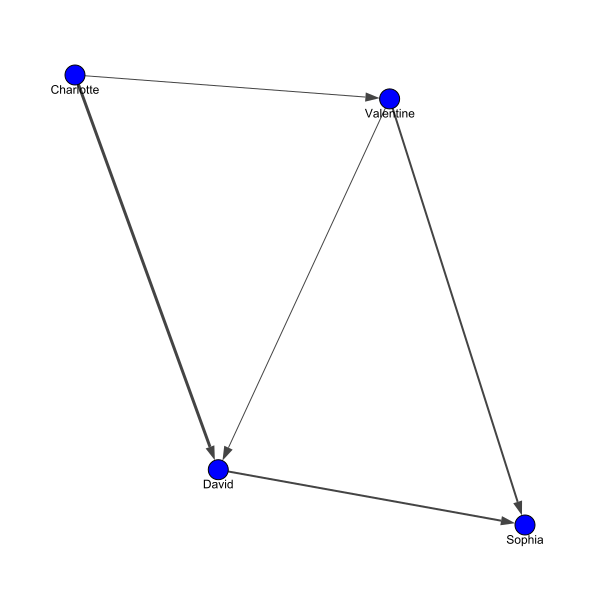

In [50]:
layout = graphe.layout('kk')

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = graphe.vs["name"]
visual_style["layout"] = layout
visual_style["vertex_color"] = 'blue'
visual_style["margin"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_dist"] = 1
visual_style["margin"] = 75


plot(graphe, **visual_style)

## Cinquième étape : calcul du chemin le plus court

Nous calculerons ici le chemin le plus court entre Charlotte et Sophia. Ce résultat est la durée du parcours le plus cours.

In [52]:
res = Graph.shortest_paths(graphe, source='Charlotte',target='Sophia', mode='OUT', weights = graphe.es['weight'])
print res

[[3.0]]


Le parcours le plus cours est donc un parcours de 3.

## Sixème étape : déterminer quel est ce parcours le plus cours

__TODO__